In [1]:
# Import necessary packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
# Site URL
url='https://www.dea.gov/domestic-arrests'
# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")
#print(soup.prettify()) # print the parsed data of html

In [5]:
table = soup.find_all("table")
print("Number of tables on site: ",len(table))

Number of tables on site:  1


In [14]:
# Lets go ahead and scrape first table with HTML code gdp[0]
# the head will form our column names
table1 = table[0]
body = table1.find_all("tr")

In [38]:
# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("strong"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    item = re.sub("(\xa0)|(\n)|,","", str(item))
    # append the clean column name to headings
    headings.append(item)
print(headings)

['Calendar Year', 'Number of Arrests']


In [79]:
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        if aa == "TOTAL":
            row.append(aa)
        else:
            row.append(int(aa))
    # append one row to all_rows
    all_rows.append(row)

In [80]:
# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
df = pd.DataFrame(data=all_rows,columns=headings)
df.head()

df.columns = ['Year','Arrests']
df.index = df.Year
df.drop(columns="Year", inplace=True)


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

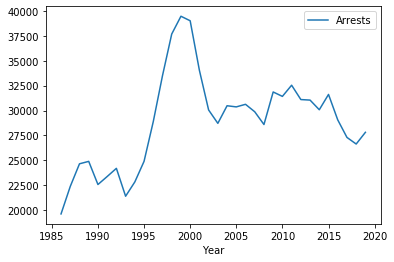

In [83]:
df.drop("TOTAL").plot()

In [103]:
df.to_csv('DEA_Arrests.csv')